# **Importing Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as mp
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf


# **Importing Datasets**

In [2]:
train = pd.read_csv('Resources/train.csv')
stores = pd.read_csv('Resources/stores.csv')
features = pd.read_csv('Resources/features.csv')

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# **Data Prep**

In [6]:
DataTrain = train.merge(features,how='left',indicator=True).merge(stores,how='left')
DataTrain.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315


In [7]:
DataTrain.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
_merge               0
Type                 0
Size                 0
dtype: int64

In [8]:
# MARK downs has a lot of null for this model we will drop this column and might come back to see if this does change anything as well as '_merge'
DataTrain_mark =DataTrain.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','_merge'],axis=1)
DataTrain_mark.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [9]:
# Check weekly sales for outliners with negative values 
DataTrain_mark.loc[DataTrain_mark['Weekly_Sales']<=0] #outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,B,118221


In [10]:
DataTrain_outliners  =DataTrain_mark.loc[DataTrain_mark['Weekly_Sales']>0]
DataTrain_outliners.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [11]:
DataTrain_outliners['year'] = pd.DatetimeIndex(DataTrain_outliners['Date']).year #Separating year data.
DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_42860\3166447939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['year'] = pd.DatetimeIndex(DataTrain_outliners['Date']).year #Separating year data.


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010


In [12]:
DataTrain_outliners['month'] = pd.DatetimeIndex(DataTrain_outliners['Date']).month #extract month data
DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_42860\499996352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['month'] = pd.DatetimeIndex(DataTrain_outliners['Date']).month #extract month data


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3


In [13]:
DataTrain_outliners.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
year              int32
month             int32
dtype: object

In [14]:
DataTrain_outliners['Date'] =   pd.to_datetime(DataTrain_outliners['Date'])

C:\Users\david\AppData\Local\Temp\ipykernel_42860\90191364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['Date'] =   pd.to_datetime(DataTrain_outliners['Date'])


In [15]:
DataTrain_outliners.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
year                     int32
month                    int32
dtype: object

In [16]:
DataTrain_outliners['week'] =  DataTrain_outliners['Date'].dt.isocalendar().week
DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_42860\3978361699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['week'] =  DataTrain_outliners['Date'].dt.isocalendar().week


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,9


In [17]:
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()



# Encode labels in column 'species'.
DataTrain_outliners['IsHoliday']= label_encoder.fit_transform(DataTrain_outliners['IsHoliday'])
DataTrain_outliners['Type']= label_encoder.fit_transform(DataTrain_outliners['Type'])

DataTrain_outliners.head()

C:\Users\david\AppData\Local\Temp\ipykernel_42860\1737466138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['IsHoliday']= label_encoder.fit_transform(DataTrain_outliners['IsHoliday'])
C:\Users\david\AppData\Local\Temp\ipykernel_42860\1737466138.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataTrain_outliners['Type']= label_encoder.fit_transform(DataTrain_outliners['Type'])


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9


                 Store      Dept      Date  Weekly_Sales  IsHoliday  \
Store         1.000000  0.024258  0.003159     -0.085117  -0.000522   
Dept          0.024258  1.000000  0.003993      0.148749   0.000663   
Date          0.003159  0.003993  1.000000     -0.000571  -0.012957   
Weekly_Sales -0.085117  0.148749 -0.000571      1.000000   0.012843   
IsHoliday    -0.000522  0.000663 -0.012957      0.012843   1.000000   
Temperature  -0.050230  0.004727  0.146955     -0.002339  -0.155775   
Fuel_Price    0.065321  0.003544  0.771944      0.000089  -0.078155   
CPI          -0.211261 -0.007178  0.077033     -0.021162  -0.001933   
Unemployment  0.208759  0.007787 -0.243463     -0.025806   0.010555   
Type          0.226352  0.003157  0.004090     -0.182229  -0.001000   
Size         -0.182763 -0.002491 -0.005122      0.244117   0.000797   
year          0.002831  0.003716  0.941465     -0.010015  -0.056572   
month         0.000907  0.000800  0.146420      0.028401   0.123058   
week  

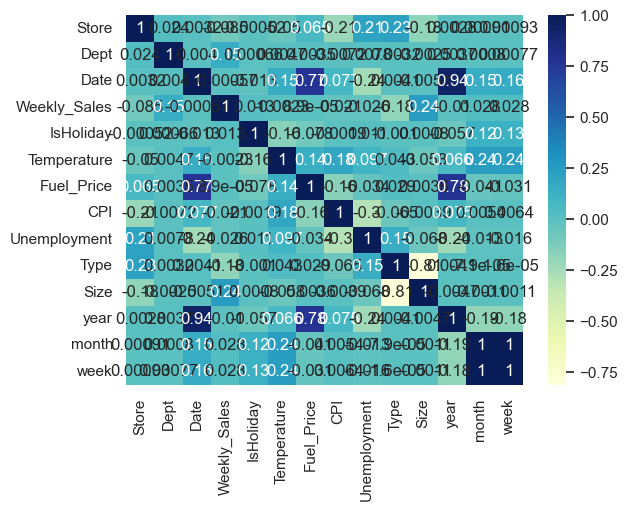

In [18]:
data = DataTrain_outliners

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

In [19]:
DataTrain_test =DataTrain_outliners.drop(['Store','Dept','Date'],axis=1)

              Weekly_Sales  IsHoliday  Temperature  Fuel_Price       CPI  \
Weekly_Sales      1.000000   0.012843    -0.002339    0.000089 -0.021162   
IsHoliday         0.012843   1.000000    -0.155775   -0.078155 -0.001933   
Temperature      -0.002339  -0.155775     1.000000    0.143700  0.182223   
Fuel_Price        0.000089  -0.078155     0.143700    1.000000 -0.164199   
CPI              -0.021162  -0.001933     0.182223   -0.164199  1.000000   
Unemployment     -0.025806   0.010555     0.096768   -0.033915 -0.299887   
Type             -0.182229  -0.001000     0.043035    0.029483 -0.065094   
Size              0.244117   0.000797    -0.058413    0.003632 -0.003903   
year             -0.010015  -0.056572     0.065712    0.779681  0.074547   
month             0.028401   0.123058     0.235957   -0.040931  0.005366   
week              0.027659   0.127846     0.236256   -0.031191  0.006428   

              Unemployment      Type      Size      year     month      week  
Weekly_S

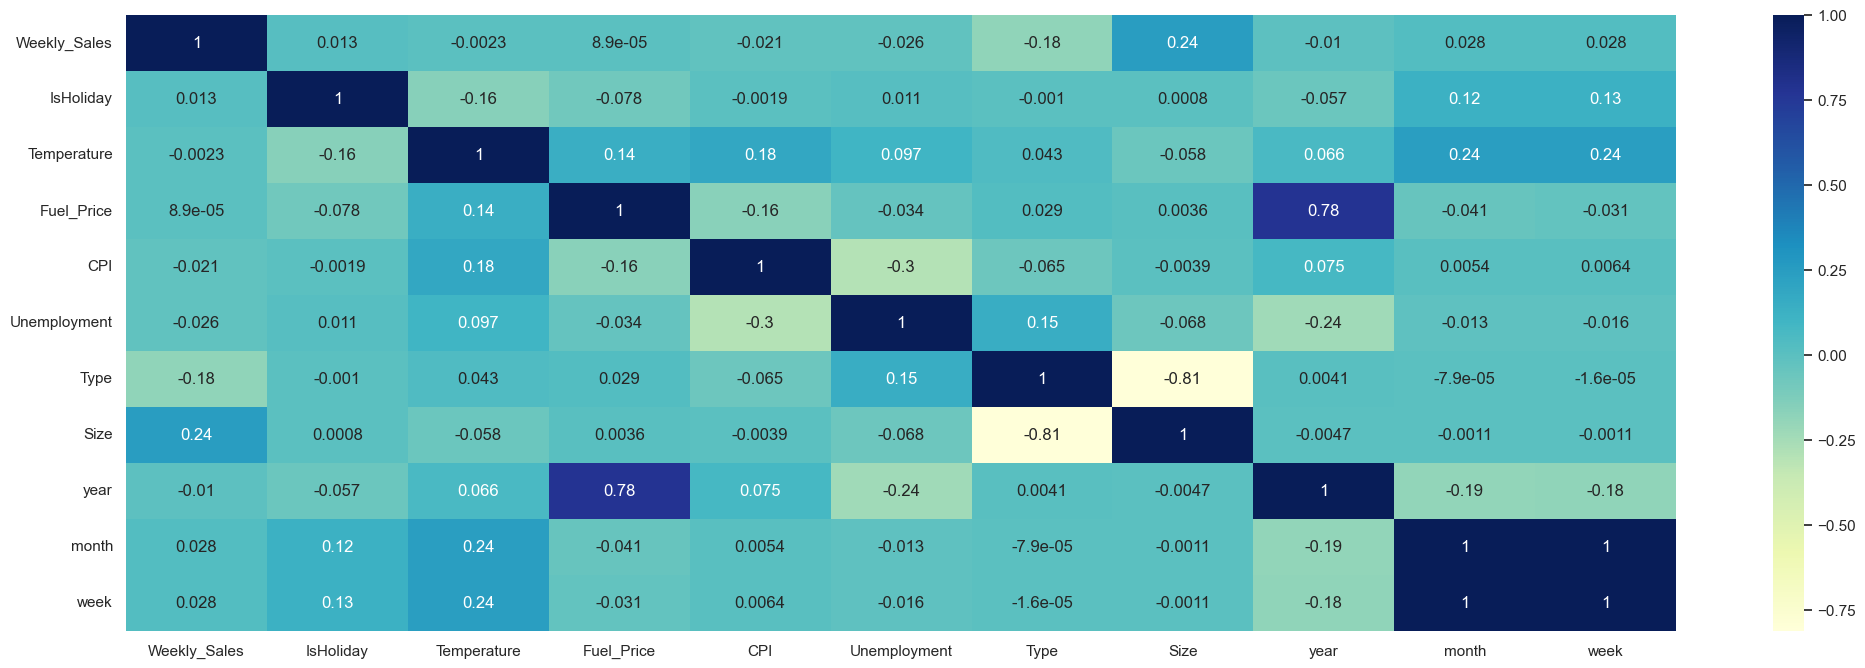

In [20]:
data1 = DataTrain_test

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data1.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()